Erasing completed. Proceeding to inpainting...


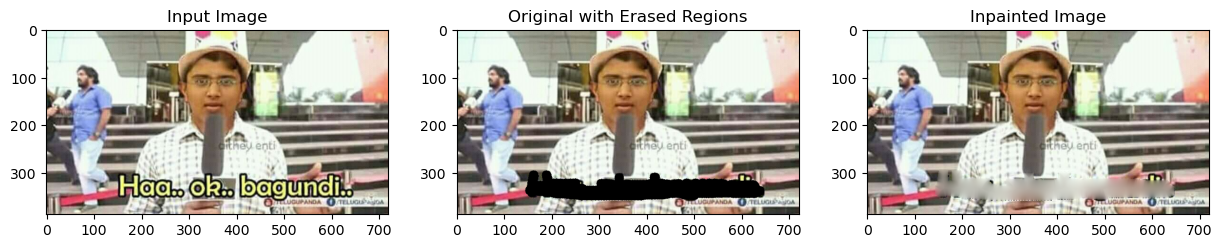

True

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the brush size for erasing
brush_size = 10

# Initialize global variables
drawing = False  # Flag to indicate if we are currently drawing (erasing)
mask = None  # Mask to store the erased regions
image = None  # Current image (which will be modified during drawing)
original_image = None  # Store the original image without modification
history = []  # List to store the history of image states for undo

# Mouse callback function to handle drawing/erasing
def draw(event, x, y, flags, param):
    global drawing, mask, image, history

    # Start drawing when the mouse is pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        # Save the current state of the image in the history for undo
        history.append(image.copy())
        cv2.circle(image, (x, y), brush_size, (0, 0, 0), -1)  # Black circle (erasing)
        mask[y - brush_size:y + brush_size, x - brush_size:x + brush_size] = 1  # Update mask

    # Drawing while the mouse is moving and the button is pressed
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(image, (x, y), brush_size, (0, 0, 0), -1)  # Black circle (erasing)
            mask[y - brush_size:y + brush_size, x - brush_size:x + brush_size] = 1  # Update mask

    # Stop drawing when the mouse button is released
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# Load the image
image_path = '/Users/surya/Documents/All/templates/photo_2024-11-19_17-49-08 (3).jpg'  # Providing my Image URL path
image = cv2.imread(image_path)

# Store the original image (without modifications)
original_image = image.copy()

# Initialize the mask with zeros (no erased areas initially)
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Create a window and set the mouse callback function
cv2.namedWindow("Interactive Image Editing")
cv2.setMouseCallback("Interactive Image Editing", draw)

while True:
    # Show the image in the window
    cv2.imshow("Interactive Image Editing", image)

    # Wait for key press to exit, undo, or perform inpainting
    key = cv2.waitKey(1) & 0xFF

    # If 'Enter' is pressed, exit the loop (finish erasing)
    if key == 13:  # 13 is the ASCII code for Enter
        print("Erasing completed. Proceeding to inpainting...")
        break

    # If 'Esc' key is pressed, exit without saving
    if key == 27:  # 27 is the ASCII code for Esc
        print("Exiting without saving.")
        cv2.destroyAllWindows()
        exit()

    # If 'u' key is pressed, undo the last action
    if key == ord('u'):  # 'u' key for undo
        if history:
            image = history.pop()  # Restore the last image state
            mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Reset the mask

# After editing, perform inpainting on the erased regions using Telea method
inpainted_image = cv2.inpaint(image, mask, 5000000, cv2.INPAINT_TELEA)

# Show the original, erased, and inpainted images side by side
h, w = image.shape[:2]
fig, axes = plt.subplots(1, 3, figsize=(15, 20))

# Original image without any erasing
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Input Image")
axes[0].set_yticks(range(0, h + 10, 100))  # Scale from 0 to image height in steps of 100
axes[0].grid(visible=False)

# Original image with erased regions
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Original with Erased Regions")
axes[1].set_yticks(range(0, h + 10, 100))  # Scale from 0 to image height in steps of 100
axes[1].grid(visible=False)

# Inpainted image with erased regions filled in
axes[2].imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Inpainted Image")
axes[2].set_yticks(range(0, h + 10, 100))  # Scale from 0 to image height in steps of 100
axes[2].grid(visible=False)

plt.show()

# Optionally, save the results
cv2.imwrite("original_image.jpg", original_image)
cv2.imwrite("original_with_erased.jpg", image)
cv2.imwrite("inpainted_image.jpg", inpainted_image)

# Close all OpenCV windows